<h1 align='center'>Introduction</h1>

![picture](https://www.lovibond.com/ix_pim_assets/Industrien_und_Applikationen/Applikationen/Trinkwasseraufbereitung/MB4/app_drinking_water_mb4_04.jpg)

<p>&emsp;Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.</p>

<p>&emsp;This notebook will explore features related to water potability and predict water potability using statistics and Machine Learning. You can get the <a href="https://www.kaggle.com/adityakadiwal/water-potability">Water Quality</a> dataset from Kaggle.</p>

<h1 align='center'>Features</h1>

<ol>
<li><b>ph</b>: pH of 1. water (0 to 14).</li>
<li><b>Hardness</b>: Capacity of water to precipitate soap in mg/L.</li>
<li><b>Solids</b>: Total dissolved solids in ppm.</li>
<li><b>Chloramines</b>: Amount of Chloramines in ppm.</li>
<li><b>Sulfate</b>: Amount of Sulfates dissolved in mg/L.</li>
<li><b>Conductivity</b>: Electrical conductivity of water in μS/cm.</li>
<li><b>Organic_carbon</b>: Amount of organic carbon in ppm.</li>
<li><b>Trihalomethanes</b>: Amount of Trihalomethanes in μg/L.</li>
<li><b>Turbidity</b>: Measure of light emiting property of water in NTU.</li>
<li><b>Potability</b>: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0</li>
</ol>

<h1 align='center'>Packages</h1>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pprint import pprint
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.utils import resample

<h1 align='center'>Dataset Import</h1>

In [2]:
df = pd.read_csv("dataset/water_potability.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


There are 3276 rows and 10 columns in the dataset.

<h1 align='center'>Data Visualization</h1>

### Check the distribution of features

<b>ph: </b>pH is a measure of how acidic/basic water is. The range goes from 0 to 14, with 7 being neutral. pHs of less than 7 indicate acidity, whereas a pH of greater than 7 indicates a base. The best pH for drinking water is 6.5 to 8.5.

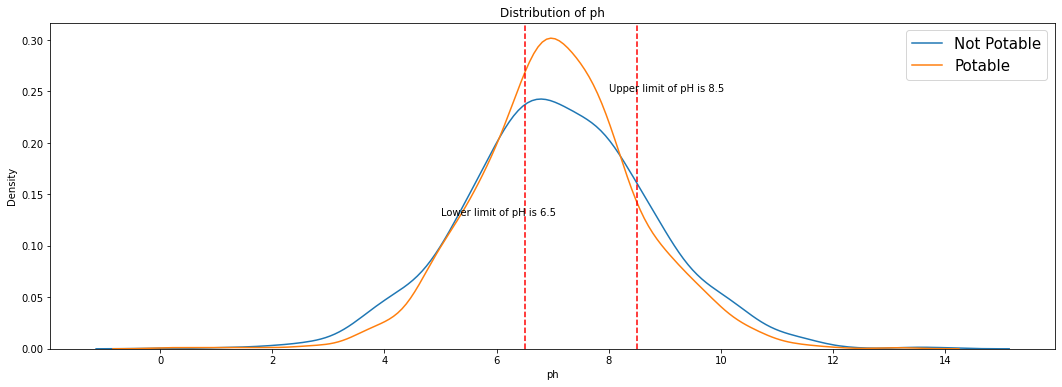

In [4]:
not_potable = df[df["Potability"] == 0]
potable = df[df["Potability"] == 1]

plt.figure(figsize=(18, 6))
plt.title("Distribution of ph")
sns.kdeplot(not_potable["ph"], label="Not Potable")
sns.kdeplot(potable["ph"], label="Potable")
plt.axvline(x=6.5, linestyle="--", color="r")
plt.axvline(x=8.5, linestyle="--", color="r")
plt.annotate("Lower limit of pH is 6.5", xy=(5,0.13))
plt.annotate("Upper limit of pH is 8.5", xy=(8,0.25))
plt.legend(prop=dict(size=15))
plt.show()

<b>Hardness of water: </b>Water hardness is a measure of the amount of calcium and magnesium salts in water. Calcium and magnesium enter water mainly through the weathering of rocks. The more calcium and magnesium in water, the harder the water. Water containing calcium carbonate at concentrations below 75 mg/l is generally considered as soft; 76–150 mg/l, moderately hard; 150–300 mg/l, hard; and more than 300 mg/l, very hard

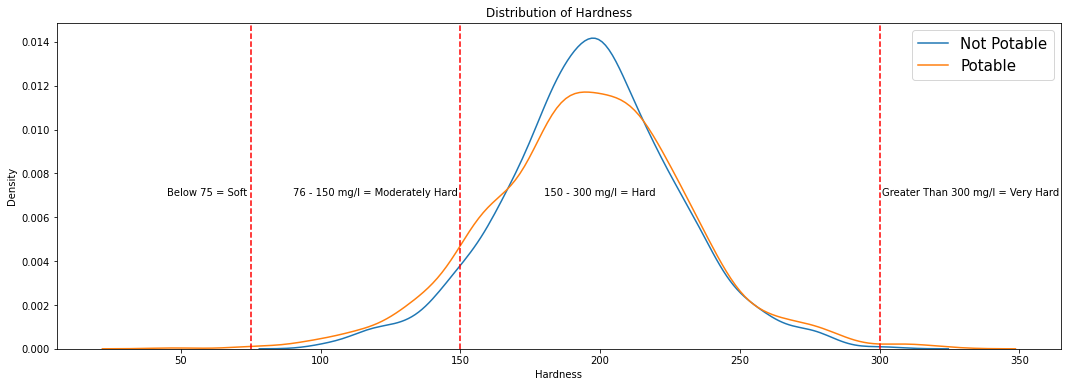

In [5]:
not_potable = df[df["Potability"] == 0]
potable = df[df["Potability"] == 1]

plt.figure(figsize=(18, 6))
plt.title("Distribution of Hardness")
sns.kdeplot(not_potable["Hardness"], label="Not Potable")
sns.kdeplot(potable["Hardness"], label="Potable")
plt.axvline(x=75, linestyle="--", color="r")
plt.axvline(x=150, linestyle="--", color="r")
plt.axvline(x=300, linestyle="--", color="r")
plt.annotate("Below 75 = Soft", xy=(45, 0.007))
plt.annotate("76 - 150 mg/l = Moderately Hard", xy=(90,0.007))
plt.annotate("150 - 300 mg/l = Hard", xy=(180,0.007))
plt.annotate("Greater Than 300 mg/l = Very Hard", xy=(301, 0.007))
plt.legend(prop=dict(size=15))
plt.show()

<b>Solids: </b>Total solids are dissolved solids plus suspended and settleable solids in water. In stream water, dissolved solids consist of calcium, chlorides, nitrate, phosphorus, iron, sulfur, and other ions particles.

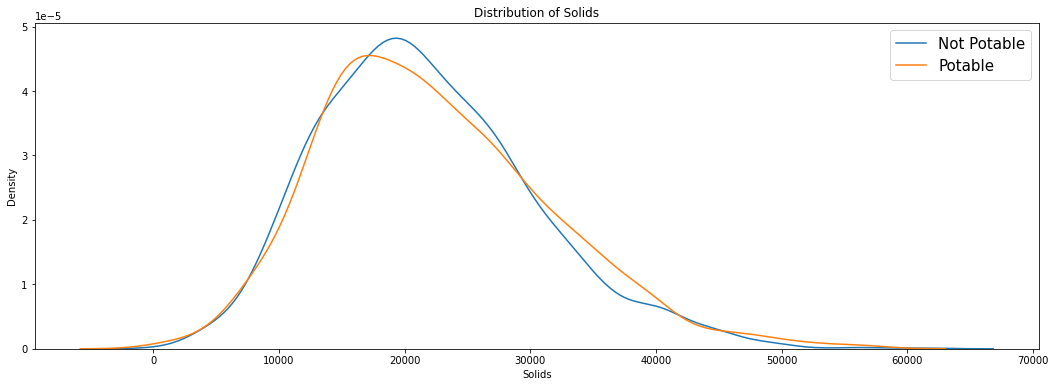

In [6]:
not_potable = df[df["Potability"] == 0]
potable = df[df["Potability"] == 1]

plt.figure(figsize=(18, 6))
plt.title("Distribution of Solids")
sns.kdeplot(not_potable["Solids"], label="Not Potable")
sns.kdeplot(potable["Solids"], label="Potable")
plt.legend(prop=dict(size=15))
plt.show()

<b>Chloramines: </b>Chloramines are disinfectants used to treat drinking water. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water.

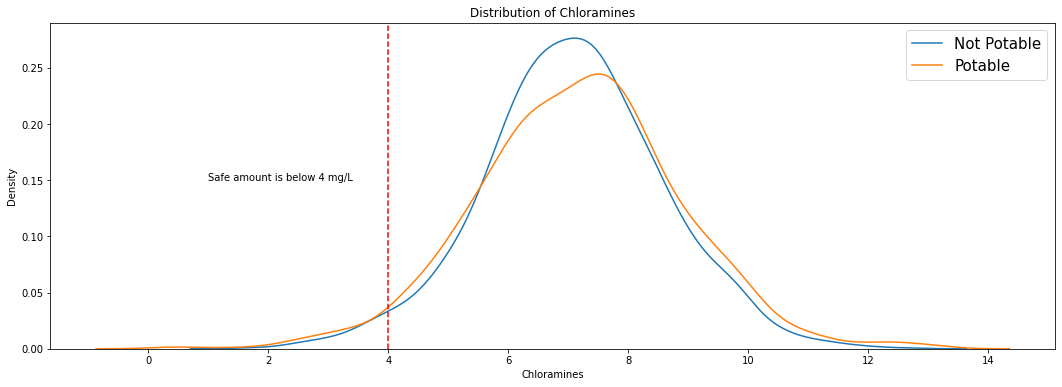

In [7]:
not_potable = df[df["Potability"] == 0]
potable = df[df["Potability"] == 1]

plt.figure(figsize=(18, 6))
plt.title("Distribution of Chloramines")
sns.kdeplot(not_potable["Chloramines"], label="Not Potable")
sns.kdeplot(potable["Chloramines"], label="Potable")
plt.axvline(x=4, linestyle="--", color="r")
plt.annotate("Safe amount is below 4 mg/L", xy=(1, 0.15))
plt.legend(prop=dict(size=15))
plt.show()

<b>Sulfate: </b>Sulfates are a combination of sulfur and oxygen and are a part of naturally occurring minerals in some soil and rock formations that contain groundwater. The mineral dissolves over time and is released into groundwater.

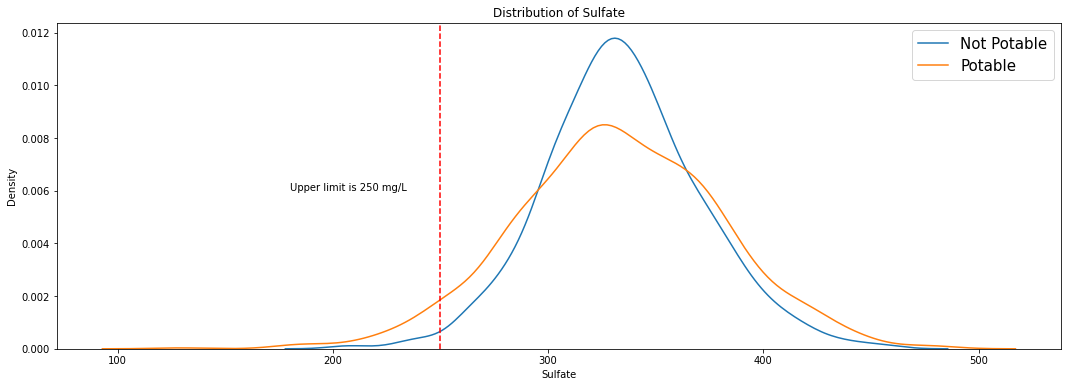

In [8]:
not_potable = df[df["Potability"] == 0]
potable = df[df["Potability"] == 1]

plt.figure(figsize=(18, 6))
plt.title("Distribution of Sulfate")
sns.kdeplot(not_potable["Sulfate"], label="Not Potable")
sns.kdeplot(potable["Sulfate"], label="Potable")
plt.axvline(x=250, linestyle="--", color="r")
plt.annotate("Upper limit is 250 mg/L", xy=(180, 0.006))
plt.legend(prop=dict(size=15))
plt.show()

<b>Conductivity: </b>Conductivity is a measure of the ability of water to pass an electrical current. Typically, the conductivity of drinking water should fall between 200 - 800 μS/cm.

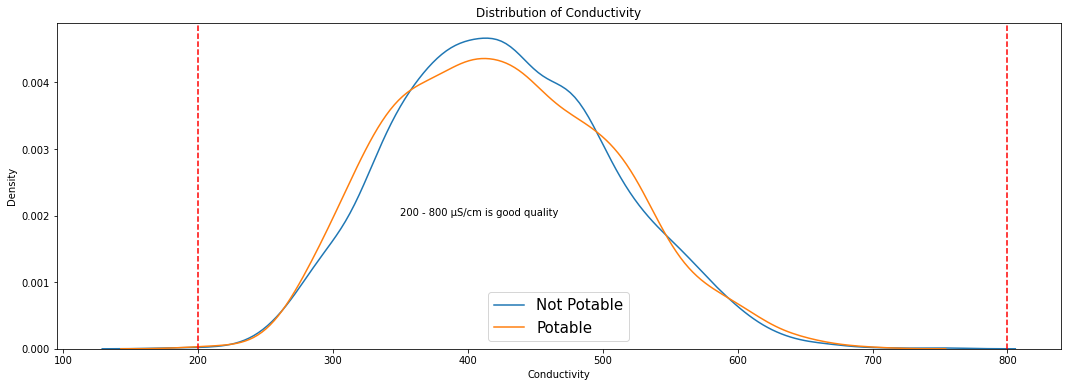

In [9]:
not_potable = df[df["Potability"] == 0]
potable = df[df["Potability"] == 1]

plt.figure(figsize=(18, 6))
plt.title("Distribution of Conductivity")
sns.kdeplot(not_potable["Conductivity"], label="Not Potable")
sns.kdeplot(potable["Conductivity"], label="Potable")
plt.axvline(x=200, linestyle="--", color="r")
plt.axvline(x=800, linestyle="--", color="r")
plt.annotate("200 - 800 μS/cm is good quality", xy=(350, 0.002))
plt.legend(prop=dict(size=15))
plt.show()

<b>Organic Carbon: </b>Total Organic Carbon (TOC) is a measure of the total amount of carbon in organic compounds in pure water and aqueous systems. The larger the carbon or organic content, the more oxygen is consumed. A high organic content means an increase in the growth of microorganisms which contribute to the depletion of oxygen supplies.

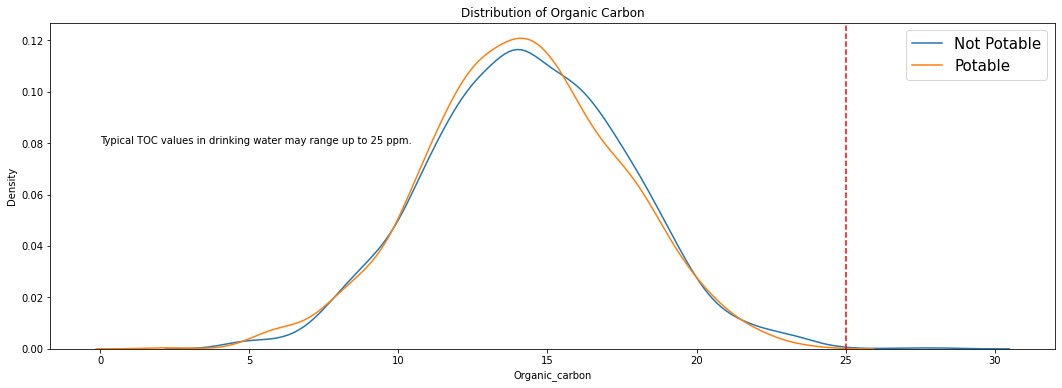

In [10]:
not_potable = df[df["Potability"] == 0]
potable = df[df["Potability"] == 1]

plt.figure(figsize=(18, 6))
plt.title("Distribution of Organic Carbon")
sns.kdeplot(not_potable["Organic_carbon"], label="Not Potable")
sns.kdeplot(potable["Organic_carbon"], label="Potable")
plt.axvline(x=25, linestyle="--", color="r")
plt.annotate("Typical TOC values in drinking water may range up to 25 ppm.", xy=(0, 0.08))
plt.legend(prop=dict(size=15))
plt.show()

<b>Trihalomethanes: </b>Trihalomethanes are the result of a reaction between the chlorine used for disinfecting tap water and natural organic and inorganic matter in the water. According to the Canadian Drinking Water Guidelines and the Ontario Drinking Water Quality Standards, the maximum acceptable concentration for THMs is a running annual average of 100 µg/L.

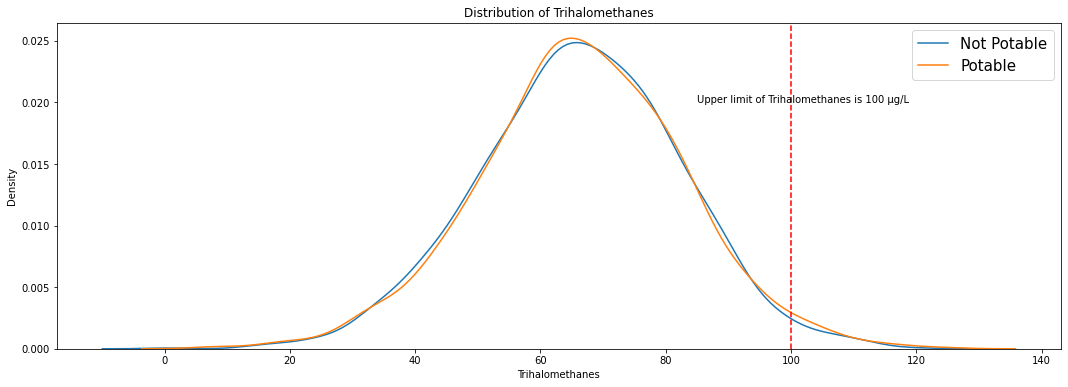

In [11]:
not_potable = df[df["Potability"] == 0]
potable = df[df["Potability"] == 1]

plt.figure(figsize=(18, 6))
plt.title("Distribution of Trihalomethanes")
sns.kdeplot(not_potable["Trihalomethanes"], label="Not Potable")
sns.kdeplot(potable["Trihalomethanes"], label="Potable")
plt.legend(prop=dict(size=15))
plt.axvline(x=100, linestyle="--", color="r")
plt.annotate("Upper limit of Trihalomethanes is 100 μg/L", xy=(85,0.02))
plt.show()

<b>Turbidity: </b>The measure of relative clarity of a liquid. It is an optical characteristic of water and is a measurement of the amount of light that is scattered by material in the water when a light is shined through the water sample. The WHO (World Health Organization), establishes that the turbidity of drinking water shouldn't be more than 5 NTU, and should ideally be below 1 NTU.

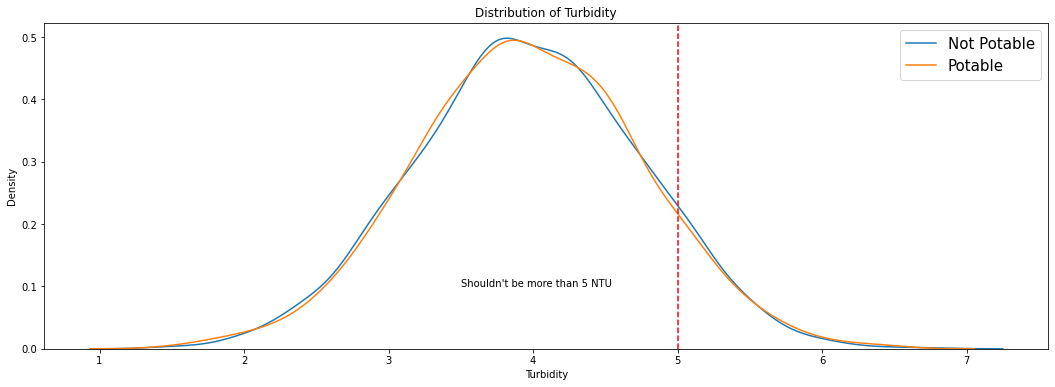

In [12]:
not_potable = df[df["Potability"] == 0]
potable = df[df["Potability"] == 1]

plt.figure(figsize=(18, 6))
plt.title("Distribution of Turbidity")
sns.kdeplot(not_potable["Turbidity"], label="Not Potable")
sns.kdeplot(potable["Turbidity"], label="Potable")
plt.axvline(x=5, linestyle="--", color="r")
plt.annotate("Shouldn't be more than 5 NTU", xy=(3.5, 0.1))
plt.legend(prop=dict(size=15))
plt.show()

<h1 align='center'>Preparing Data</h1>

### Checking For Missing Values in Dataset

In [13]:
for col in df.columns:
  p=(df[col].isnull().sum()/len(df))*100
  if p > 0:
    print('The column {0} have {1} percent of NAN values'.format(col,p.round(2)))
    print()

The column ph have 14.99 percent of NAN values

The column Sulfate have 23.84 percent of NAN values

The column Trihalomethanes have 4.95 percent of NAN values



### Dropping Missing Values

It's best to not replace the missing values because water quality is a sensitive data.

In [14]:
df= df.dropna()
df.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

### Balancing Dataset

As seen on the pie plot data is unbalanced. We need to upsample potable data so there is no bias.

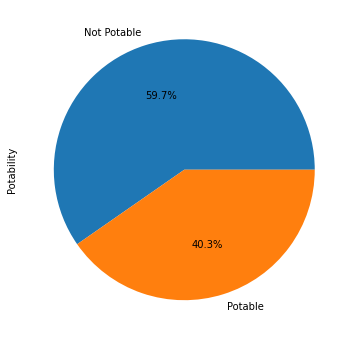

In [15]:
potability_count = df["Potability"].replace({0: "Not Potable", 1: "Potable"}).value_counts()
potability_count.plot(kind="pie", autopct='%1.1f%%', figsize=(15, 6))

Resampling

In [16]:
zero  = df[df['Potability']==0]   
one = df[df['Potability']==1]  

not_potable_count = df[df["Potability"] == 0].Potability.value_counts()
df_minority_upsampled = resample(one, replace = True, n_samples = not_potable_count[0]) 
df = pd.concat([zero, df_minority_upsampled])

After balancing

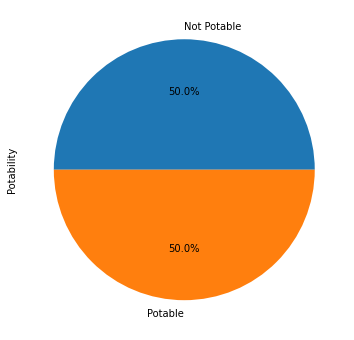

In [17]:
potability_count = df["Potability"].replace({0: "Not Potable", 1: "Potable"}).value_counts()
potability_count.plot(kind="pie", autopct='%1.1f%%', figsize=(15, 6))

<h1 align='center'>Standardization</h1>

In [18]:
X = df.drop('Potability',axis=1).values
y = df['Potability'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<h1 align='center'>Model Selection</h1>

Using baseline models and choose the one that has the highest accuracy and the do some hyperparameter tuning.

In [19]:
models = [
  ("Logistic Regression", LogisticRegression()),
  ("k-nearest neighbors (KNN)", KNeighborsClassifier(n_neighbors=1)),
  ("Decision Tree Classifier", DecisionTreeClassifier()),
  ("SVC", SVC()),
  ("Naive Bayes", GaussianNB()),
  ("Random Forest Classifier", RandomForestClassifier())
]

for name, model in models:
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)
  score = precision_score(y_test, prediction)
  print("Accuracy of model {0}: {1}".format(name, score))
  print()


Accuracy of model Logistic Regression: 0.47540983606557374

Accuracy of model k-nearest neighbors (KNN): 0.7298245614035088

Accuracy of model Decision Tree Classifier: 0.7086330935251799

Accuracy of model SVC: 0.7037037037037037

Accuracy of model Naive Bayes: 0.6029411764705882

Accuracy of model Random Forest Classifier: 0.8638297872340426



<h1 align='center'>Hyperparameter Tuning</h1>

Random Forest Classifier is the best performing model. So the next step is perform hyperparameter tuning for the model. Random Search Cross Validation is going to be used to determine the best value for each hyperparameter.

Create parameter grid to sample from during fitting

In [20]:
n_estimators = [200, 400, 600]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [10, 20, 30, 40, 50]

random_grid = {
  'n_estimators': n_estimators,
  'max_features': max_features,
  'max_depth': max_depth,
}

pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt', 'log2'],
 'n_estimators': [200, 400, 600]}


Now, we instantiate the random search and fit it like any Scikit-Learn model

In [21]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 45, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  2.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [22]:
print("Best parameters for Random Forest:", rf_random.best_params_)

Best parameters for Random Forest: {'n_estimators': 600, 'max_features': 'auto', 'max_depth': 40}


<h1 align='center'>Final Model</h1>

In [24]:
model = RandomForestClassifier(n_estimators=400, max_features='log2', max_depth=30)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
score = precision_score(y_test, prediction)

print("Accuracy of Random Forest: {0}".format(score))

Accuracy of Random Forest: 0.8669527896995708


<h1 align='center'>Conclusion</h1>



1. 76.6% of water samples were safe for drinking in terms of Trihalomethane levels in water.

2. 35.8% of water samples were safe for drinking in terms of pH.

3. 99.9% of the data was considered hard.

4. Only 2.7% of water sample were safe for drinking in terms of Chloramines levels in water.

5. Only 1.7% of water sample were safe for drinking in terms of Chloramines levels in water.

6. 76.2% of water samples were safe for drinking in terms of Conductivity levels in water.

7. 99.9% of water samples have typical TOC value.

8. 90.4% of water samples were safe for drinking in terms of Conductivity levels in water.

9. Random Forest is the algorithm with best performance.

10. After doing some tuning the accuracy of the model is >83%.
